In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("F:\Projects\Machine and Deep Learning\IPL\cricsheet\Final Nail in the Coffin\Datasets\Antim_Dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ketan\AppData\Local\Temp\ipykernel_19236\1141707121.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("F:\Projects\Machine and Deep Learning\IPL\cricsheet\Final Nail in the Coffin\Datasets\Antim_Dataset.csv")


,Venue,Date,Match No.,Innings No.,Batting Team,Bowling Team,Over,Striker,Non Striker,Bowler,...,Previous Average Striker Runs 5,Previous Average Striker Runs 6,Previous Average Conceded Runs by Bowler 3,Previous Average Conceded Runs by Bowler 6,Previous Current Run Rate,Previous Pressure Index,Previous Wickets Remaining,Run Conceded by bowler on prev Bowl,Bowler Economy,Bowler Economy till prev ball
0,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.1,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,2.000000,10.0,0.0,7.0,0.0
1,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.2,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,0.760224,10.0,0.0,7.0,7.0
2,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.3,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.422486,10.0,0.0,7.0,7.0
3,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.4,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.333333,0.651026,10.0,0.0,7.0,7.0
4,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.5,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.645517,10.0,1.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34966 entries, 0 to 34965
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Venue                                       34966 non-null  object 
 1   Date                                        34966 non-null  object 
 2   Match No.                                   34966 non-null  int64  
 3   Innings No.                                 34966 non-null  int64  
 4   Batting Team                                34966 non-null  object 
 5   Bowling Team                                34966 non-null  object 
 6   Over                                        34966 non-null  float64
 7   Striker                                     34966 non-null  object 
 8   Non Striker                                 34966 non-null  object 
 9   Bowler                                      34966 non-null  object 
 10  Runs by Ba

In [5]:
def correlation_table_display(df, feature_list, target_variable):
    print("Feature List and Target")
    print(feature_list, target_variable, sep='\n\n')

    # Use only the relevant numeric columns
    cor = df[feature_list + [target_variable]].corr(numeric_only=True)
    cor_table = cor[target_variable].sort_values(ascending=False)

    print("Correlation Table:")
    print(cor_table)

    # Plot
    plt.figure(figsize=(25, 10))
    sns.barplot(x=cor_table.values, y=cor_table.index, hue=cor_table.index, palette="coolwarm", legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Correlation Coefficient")
    plt.title("Correlation with Target")
    plt.tight_layout()
    plt.show()
    print("-----------***--------------***-------------***")

In [6]:
def print_pps_score(df, feature_list, target_variable):
    print("Feature List and Target")
    print(feature_list, target_variable, sep='\n\n')

    pps_scores = {col: pps.score(df, col, target_variable)["ppscore"] for col in feature_list}
    pps_df = pd.DataFrame(pps_scores.items(), columns=['Feature', 'PPS'])

    pps_df = pps_df.sort_values(by="PPS", ascending=False)
    print("PPS Table:")
    print(pps_df)
    print("-----------***--------------***-------------***")


In [7]:
def vif_display(df, feature_list, target_variable, df_name="DataFrame"):
    print(f"{df_name} - Feature List and Target")
    print(feature_list, target_variable, sep='\n')
    print('\n')

    dfx = df[feature_list]
    x_const = add_constant(dfx)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = dfx.columns
    vif_data["VIF"] = [variance_inflation_factor(x_const.values, i + 1) for i in range(len(dfx.columns))]
    vif_data = vif_data.sort_values(by="VIF", ascending=False)

    def color_map(vif):
        if vif <= 10:
            return 'green'
        elif vif <= 100:
            return 'orange'
        else:
            return 'red'

    colors = vif_data["VIF"].apply(color_map)

    print(vif_data)

    plt.figure(figsize=(25, 10))
    ax = sns.barplot(data=vif_data, y='Feature', x='VIF', color='lightblue')  # base color

    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)

    plt.xticks(rotation=90)
    plt.ylabel("VIF Value")
    plt.title(f"Variance Inflation Factor (VIF) - {df_name}")
    plt.tight_layout()
    plt.show()
    print("-----------***--------------***-------------***")

In [8]:
def mi_score_display(df, feature_list, target_variable):
    print("Feature List and Target")
    print(feature_list, target_variable, sep='\n')
    print('\n')

    mi_x = df[feature_list]
    mi_y = df[target_variable]

    # Calculate Mutual Information Scores
    mi_scores = mutual_info_classif(mi_x, mi_y, discrete_features='auto', random_state=0)
    mi_df = pd.DataFrame({'Feature': mi_x.columns, 'MI Score': mi_scores})
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)

    # Define color threshold
    def color_map(score):
        if score > 0.2:
            return 'purple'
        elif score > 0.1:
            return 'orange'
        else:
            return 'gray'

    colors = mi_df['MI Score'].apply(color_map)

    # Print the table
    print(mi_df)

    # Plot
    plt.figure(figsize=(25, 10))
    ax = sns.barplot(data=mi_df, y='Feature', x='MI Score', color='skyblue')  # base color

    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)

    plt.xticks(rotation=90)
    plt.title("Mutual Information Scores")
    plt.tight_layout()
    plt.show()
    print("-----------***--------------***-------------***")

In [9]:
df.columns

Index(['Venue', 'Date', 'Match No.', 'Innings No.', 'Batting Team',
       'Bowling Team', 'Over', 'Striker', 'Non Striker', 'Bowler',
       'Runs by Batsman', 'Extras', 'Total runs on that bowl',
       'Runs Conceded by Bowler', 'Cumulative Runs by Batsman',
       'Cumulative Runs Conceded by Bowler', 'Cumulative Team Runs', 'Year',
       'Match ID', 'is_wicket', 'Total Wickets', 'is_legal_delivery',
       'Team Balls Count', 'Striker Balls Count', 'Team Balls Left',
       'Batsman Runs on Previous Ball', 'Total Runs on Previous Ball',
       'Over_Phase', 'Striker Strike Rate', 'Partnership Runs', 'is_dot',
       'Dot Count', 'is_boundary', 'Boundary Count', 'Average Striker Runs 3',
       'Average Striker Runs 4', 'Average Striker Runs 5',
       'Average Striker Runs 6', 'Average Conceded Runs by Bowler 3',
       'Average Conceded Runs by Bowler 6', 'Target', 'wicket_remaining',
       'Resources Remaining', 'Bowling Style', 'Venue ID', 'Batting Team ID',
       'Bowling T

In [10]:
feature_cols = [
    # Match & team context
    "Venue ID",
    "Match No.",
    "Innings No.",
    "Batting Team ID",
    "Bowling Team ID",

    # Player info
    "Striker ID",
    "Non Striker ID",
    "Bowler ID",
    "Bowling Style ID",

    # Bowler performance history
    'Bowler Economy till prev ball',
    'Run Conceded by bowler on prev Bowl',
    "Previous Average Conceded Runs by Bowler 3",
    "Previous Average Conceded Runs by Bowler 6",

    # Batter form
    "Previous Average Striker Runs 3",
    "Previous Average Striker Runs 4",
    "Previous Average Striker Runs 5",
    "Previous Average Striker Runs 6",

    # Match dynamics
    "Team Balls Count",
    "Team Balls Left",
    "Total Wickets",
    "wicket_remaining",
    "Resources Remaining",

    # Momentum/context
    "Dot Count",
    "Boundary Count",
    "Current Run Rate",
    "Previous Current Run Rate",
    "Req. Run Rate",

    # Game phase
    "Over",
    "Over_Phase",

    # Strategy pressure
    "Pressure Index",
    "Previous Pressure Index"
]

target = 'Runs by Batsman'

Feature List and Target
['Venue ID', 'Match No.', 'Innings No.', 'Batting Team ID', 'Bowling Team ID', 'Striker ID', 'Non Striker ID', 'Bowler ID', 'Bowling Style ID', 'Bowler Economy till prev ball', 'Run Conceded by bowler on prev Bowl', 'Previous Average Conceded Runs by Bowler 3', 'Previous Average Conceded Runs by Bowler 6', 'Previous Average Striker Runs 3', 'Previous Average Striker Runs 4', 'Previous Average Striker Runs 5', 'Previous Average Striker Runs 6', 'Team Balls Count', 'Team Balls Left', 'Total Wickets', 'wicket_remaining', 'Resources Remaining', 'Dot Count', 'Boundary Count', 'Current Run Rate', 'Previous Current Run Rate', 'Req. Run Rate', 'Over', 'Over_Phase', 'Pressure Index', 'Previous Pressure Index']

Runs by Batsman
Correlation Table:
Runs by Batsman                               1.000000
Bowler Economy till prev ball                 0.236740
Current Run Rate                              0.224222
Boundary Count                                0.126580
Previous 

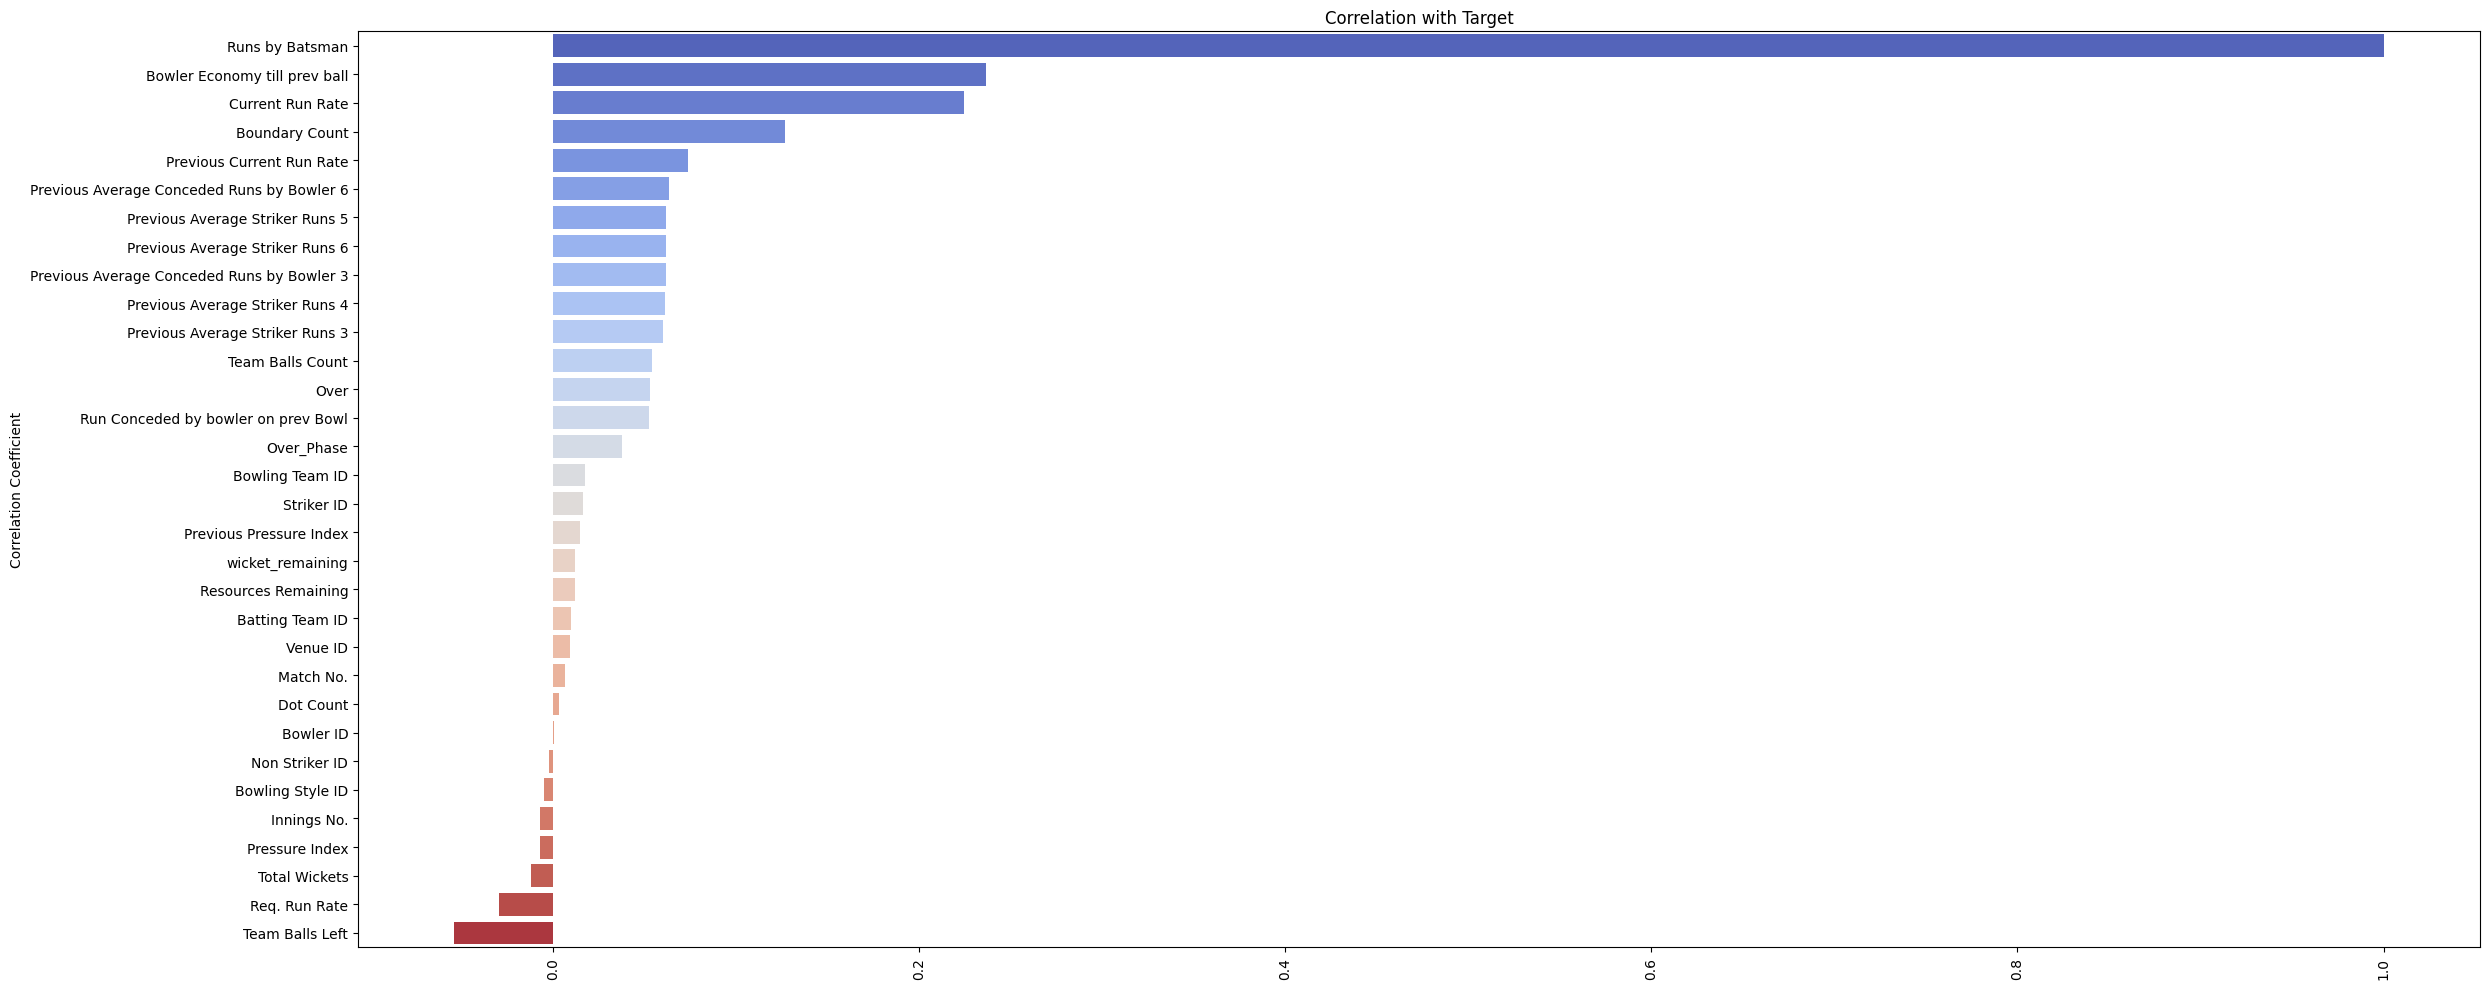

-----------***--------------***-------------***


In [11]:
correlation_table_display(df, feature_cols, target)

In [12]:
print_pps_score(df, feature_cols, target)

Feature List and Target
['Venue ID', 'Match No.', 'Innings No.', 'Batting Team ID', 'Bowling Team ID', 'Striker ID', 'Non Striker ID', 'Bowler ID', 'Bowling Style ID', 'Bowler Economy till prev ball', 'Run Conceded by bowler on prev Bowl', 'Previous Average Conceded Runs by Bowler 3', 'Previous Average Conceded Runs by Bowler 6', 'Previous Average Striker Runs 3', 'Previous Average Striker Runs 4', 'Previous Average Striker Runs 5', 'Previous Average Striker Runs 6', 'Team Balls Count', 'Team Balls Left', 'Total Wickets', 'wicket_remaining', 'Resources Remaining', 'Dot Count', 'Boundary Count', 'Current Run Rate', 'Previous Current Run Rate', 'Req. Run Rate', 'Over', 'Over_Phase', 'Pressure Index', 'Previous Pressure Index']

Runs by Batsman
PPS Table:
                                       Feature  PPS
0                                     Venue ID    0
16             Previous Average Striker Runs 6    0
29                              Pressure Index    0
28                           

DataFrame - Feature List and Target
['Venue ID', 'Match No.', 'Innings No.', 'Batting Team ID', 'Bowling Team ID', 'Striker ID', 'Non Striker ID', 'Bowler ID', 'Bowling Style ID', 'Bowler Economy till prev ball', 'Run Conceded by bowler on prev Bowl', 'Previous Average Conceded Runs by Bowler 3', 'Previous Average Conceded Runs by Bowler 6', 'Previous Average Striker Runs 3', 'Previous Average Striker Runs 4', 'Previous Average Striker Runs 5', 'Previous Average Striker Runs 6', 'Team Balls Count', 'Team Balls Left', 'Total Wickets', 'wicket_remaining', 'Resources Remaining', 'Dot Count', 'Boundary Count', 'Current Run Rate', 'Previous Current Run Rate', 'Req. Run Rate', 'Over', 'Over_Phase', 'Pressure Index', 'Previous Pressure Index']
Runs by Batsman




c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                       Feature          VIF
21                         Resources Remaining          inf
20                            wicket_remaining          inf
19                               Total Wickets          inf
18                             Team Balls Left          inf
17                            Team Balls Count          inf
27                                        Over  2399.087531
16             Previous Average Striker Runs 6   102.203517
12  Previous Average Conceded Runs by Bowler 6    98.406509
13             Previous Average Striker Runs 3    93.642366
11  Previous Average Conceded Runs by Bowler 3    91.804370
30                     Previous Pressure Index    33.836390
29                              Pressure Index    33.222505
22                                   Dot Count    16.551206
15             Previous Average Striker Runs 5    12.407603
14             Previous Average Striker Runs 4     9.581617
23                              Boundary

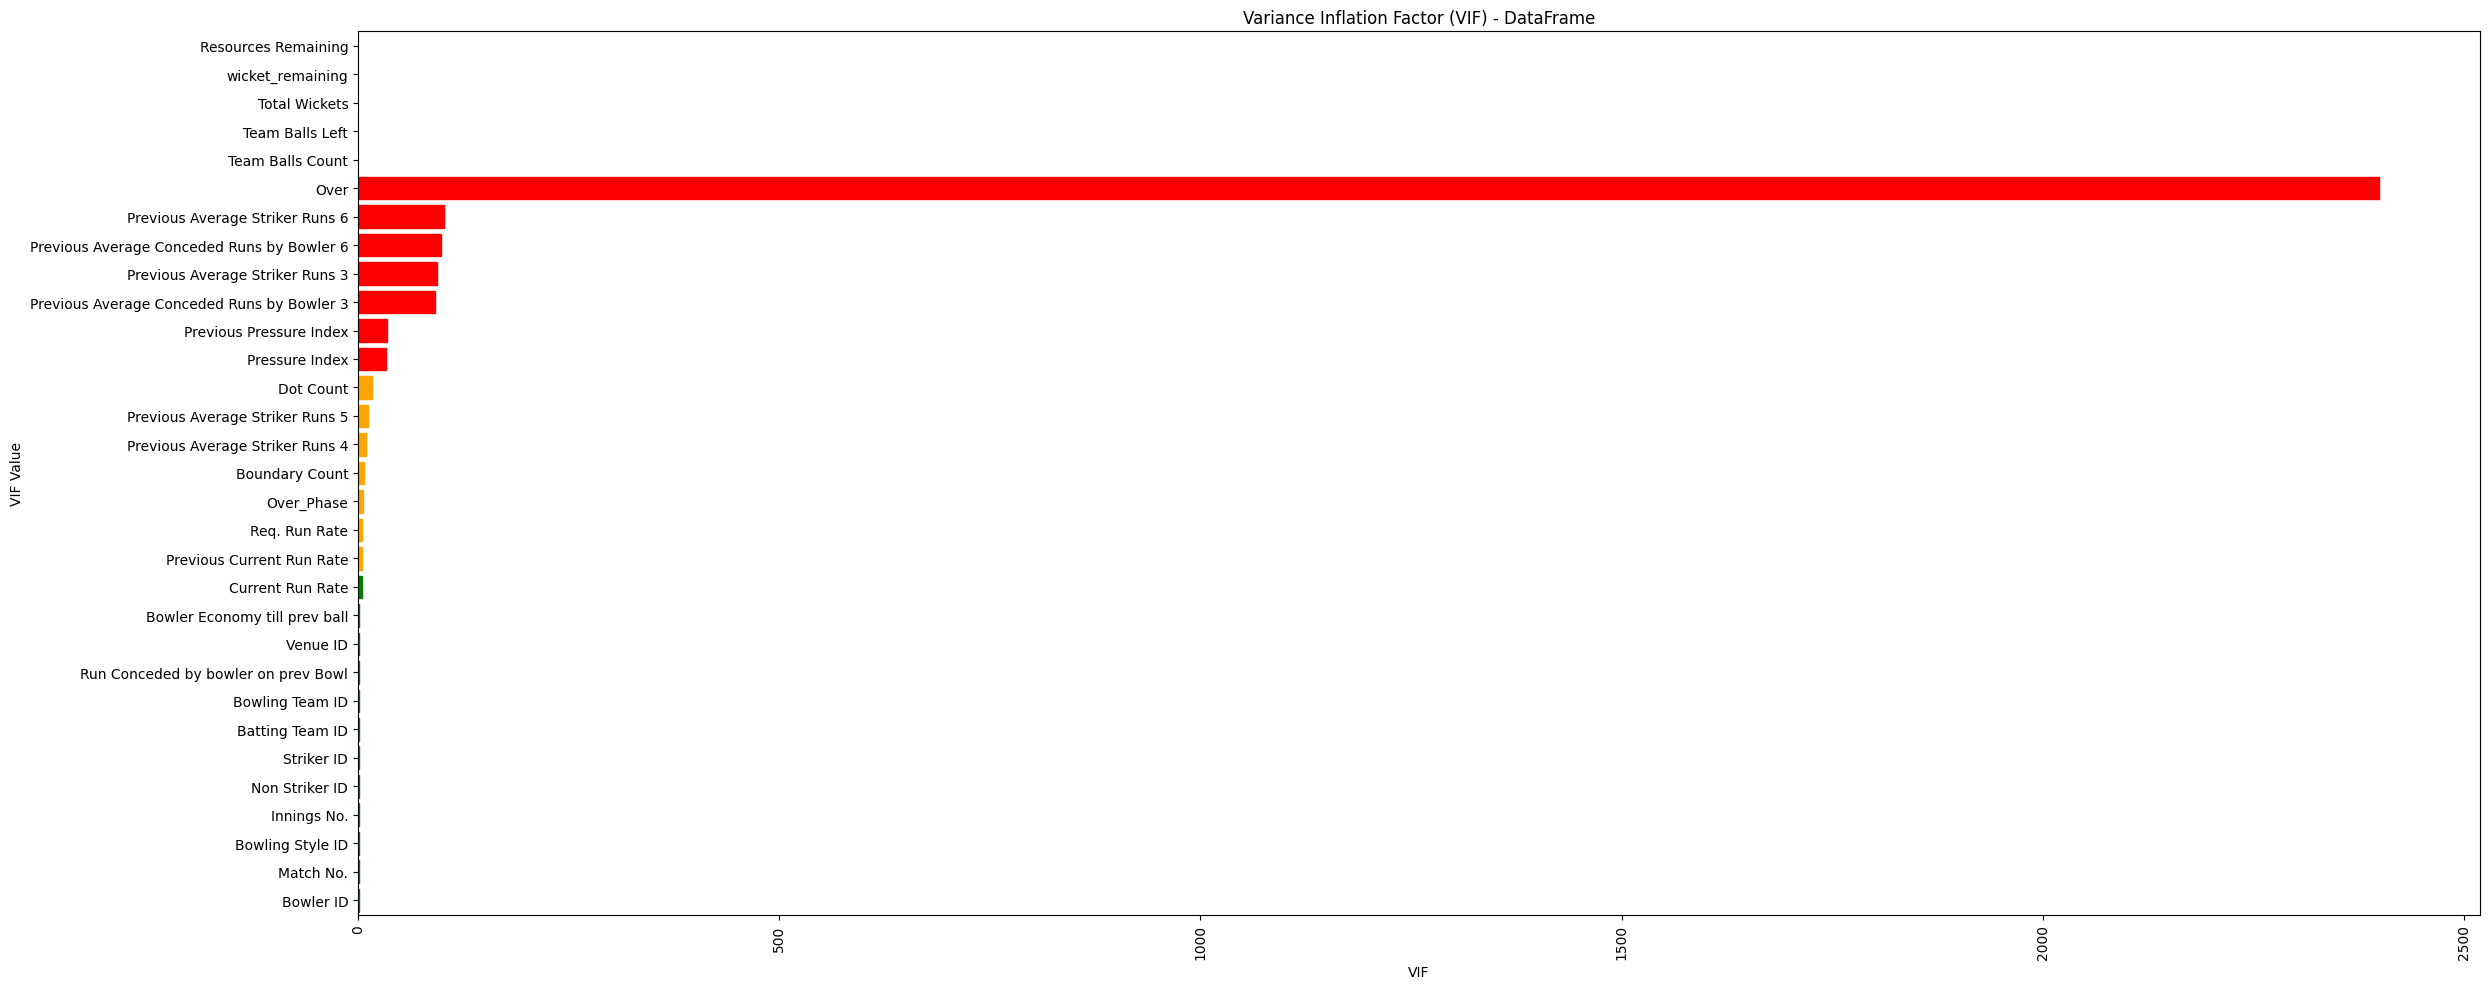

-----------***--------------***-------------***


In [13]:
vif_display(df, feature_cols, target)

Feature List and Target
['Venue ID', 'Match No.', 'Innings No.', 'Batting Team ID', 'Bowling Team ID', 'Striker ID', 'Non Striker ID', 'Bowler ID', 'Bowling Style ID', 'Bowler Economy till prev ball', 'Run Conceded by bowler on prev Bowl', 'Previous Average Conceded Runs by Bowler 3', 'Previous Average Conceded Runs by Bowler 6', 'Previous Average Striker Runs 3', 'Previous Average Striker Runs 4', 'Previous Average Striker Runs 5', 'Previous Average Striker Runs 6', 'Team Balls Count', 'Team Balls Left', 'Total Wickets', 'wicket_remaining', 'Resources Remaining', 'Dot Count', 'Boundary Count', 'Current Run Rate', 'Previous Current Run Rate', 'Req. Run Rate', 'Over', 'Over_Phase', 'Pressure Index', 'Previous Pressure Index']
Runs by Batsman




c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

                                       Feature  MI Score
24                            Current Run Rate  0.047307
9                Bowler Economy till prev ball  0.036573
29                              Pressure Index  0.035894
27                                        Over  0.030742
18                             Team Balls Left  0.030454
17                            Team Balls Count  0.029181
23                              Boundary Count  0.024192
5                                   Striker ID  0.023603
28                                  Over_Phase  0.020497
22                                   Dot Count  0.019662
7                                    Bowler ID  0.017524
25                   Previous Current Run Rate  0.016733
30                     Previous Pressure Index  0.014906
26                               Req. Run Rate  0.013377
6                               Non Striker ID  0.011827
13             Previous Average Striker Runs 3  0.009894
19                             

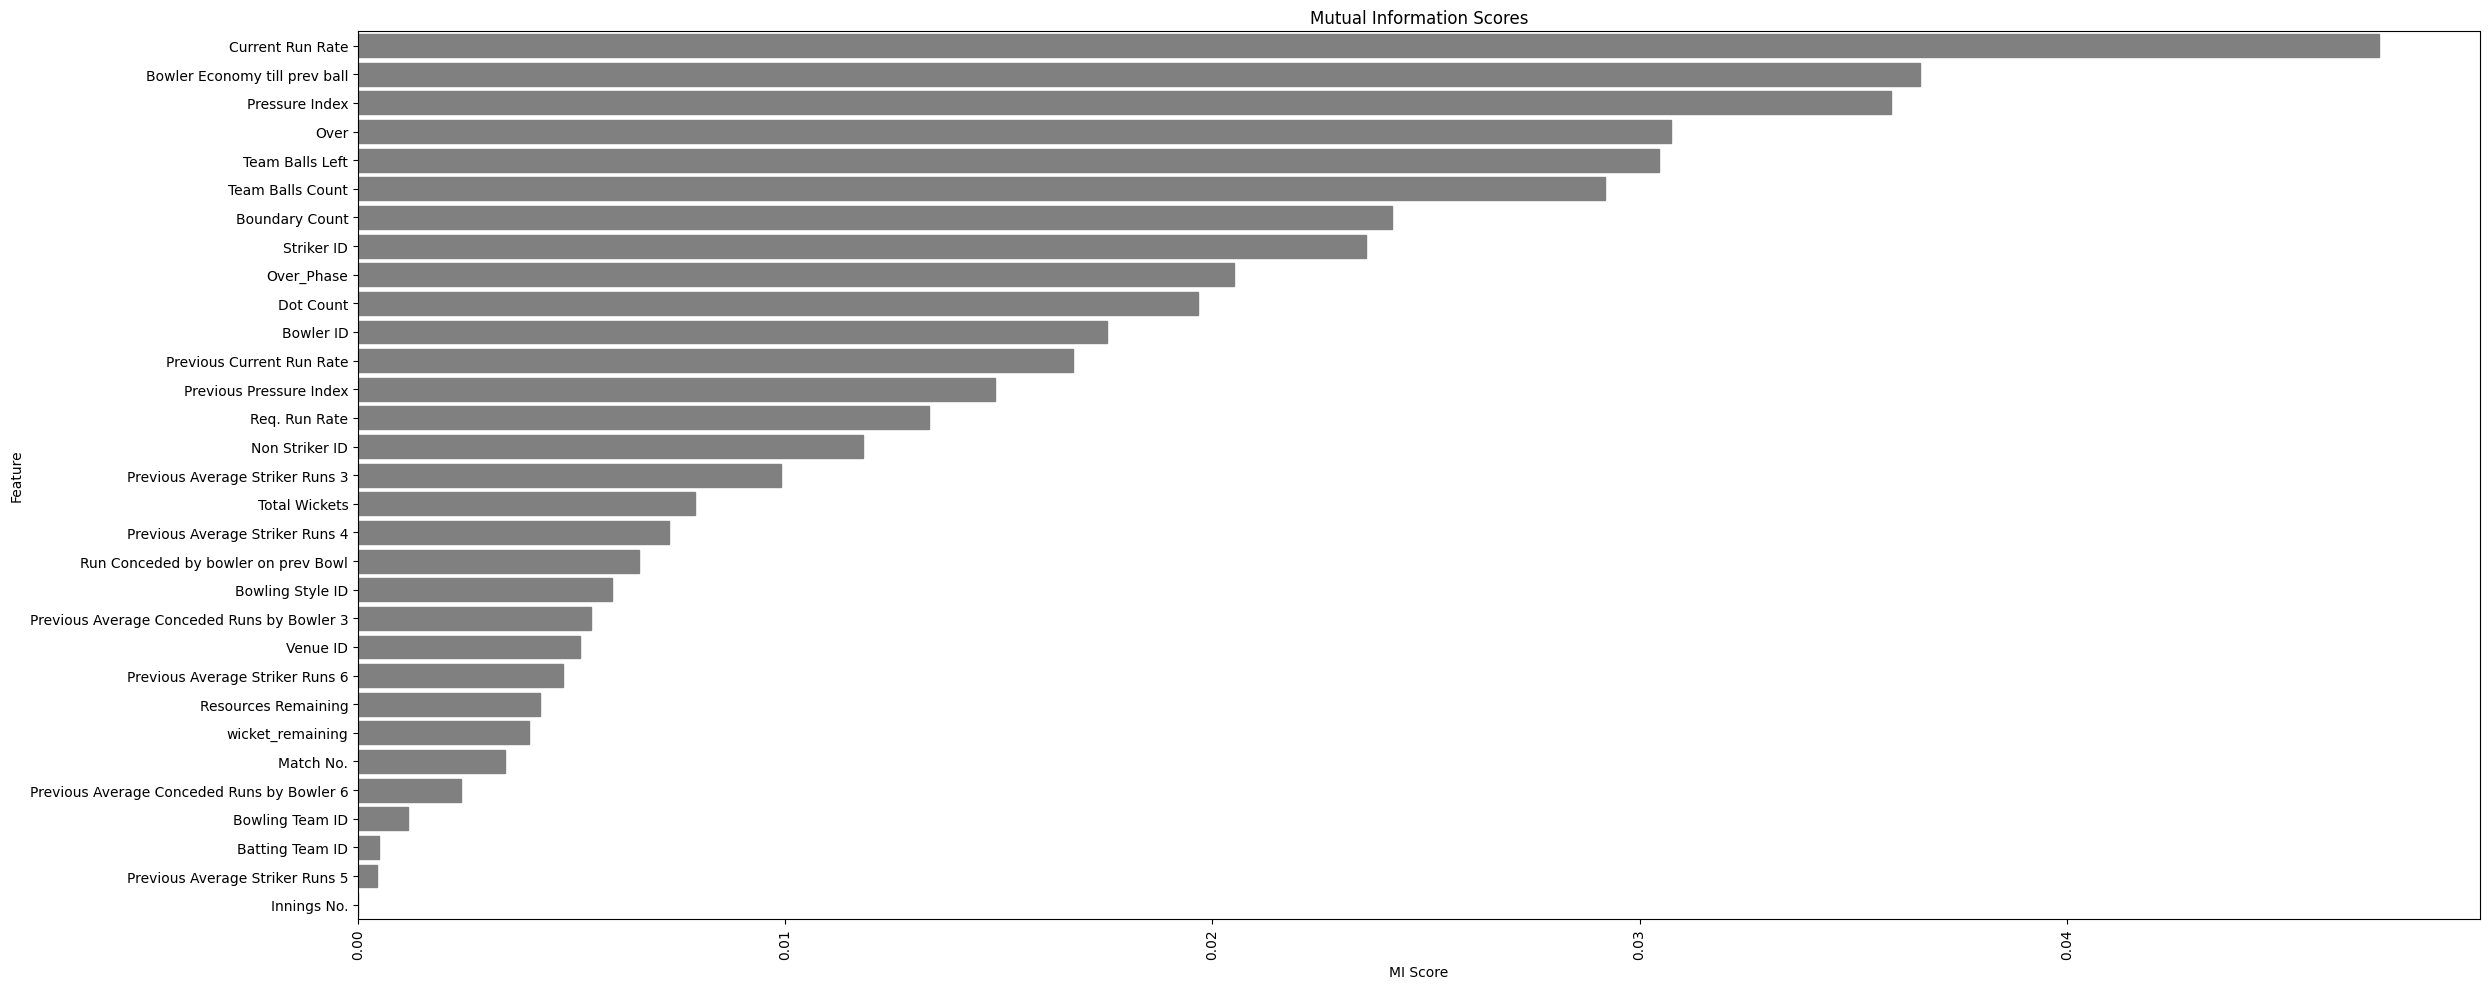

-----------***--------------***-------------***


In [14]:
mi_score_display(df, feature_cols, target)

In [15]:
x = df[feature_cols]
y = df[target]

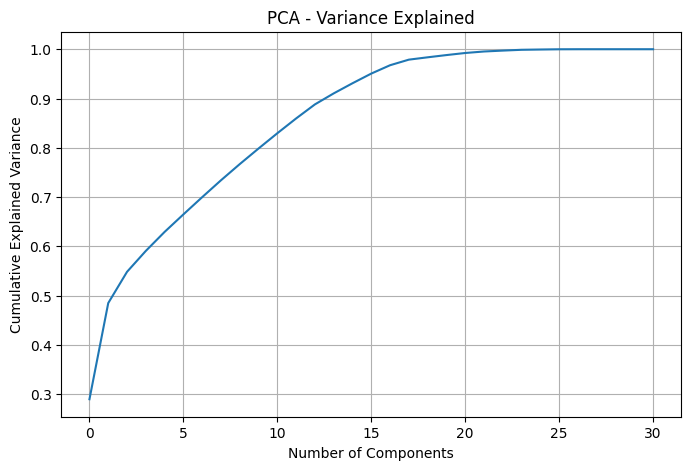

In [19]:

X_scaled = StandardScaler().fit_transform(x)
pca = PCA()
pca.fit(X_scaled)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()

In [11]:
def correlation_with_specific_class(df, feature_list, target_variable, class_value):
    print(f"Feature Correlation with Class {class_value} in Target '{target_variable}'")

    # Create binary column: 1 if target == class_value else 0
    binary_target = (df[target_variable] == class_value).astype(int)

    # Combine into DataFrame
    corr_df = df[feature_list].copy()
    corr_df[f"{target_variable}_is_{class_value}"] = binary_target

    # Compute correlation
    cor = corr_df.corr(numeric_only=True)
    cor_table = cor[f"{target_variable}_is_{class_value}"].drop(f"{target_variable}_is_{class_value}")
    cor_table = cor_table.sort_values(ascending=False)

    print("Correlation Table:")
    print(cor_table)

    # Plot
    plt.figure(figsize=(25, 10))
    sns.barplot(x=cor_table.values, y=cor_table.index, hue=cor_table.index, palette="coolwarm", legend=False)
    plt.xticks(rotation=90)
    plt.ylabel("Correlation Coefficient")
    plt.title(f"Correlation of Features with Target == {class_value}")
    plt.tight_layout()
    plt.show()
    print("-----------***--------------***-------------***")


Feature Correlation with Class 2 in Target 'Runs by Batsman'
Correlation Table:
Team Balls Count                              0.053635
Over                                          0.053117
Over_Phase                                    0.052916
Boundary Count                                0.039380
Dot Count                                     0.033388
Total Wickets                                 0.027947
Previous Pressure Index                       0.027589
Pressure Index                                0.022033
Bowler Economy till prev ball                 0.018012
Current Run Rate                              0.016180
Bowling Style ID                              0.014001
Run Conceded by bowler on prev Bowl           0.010383
Bowler ID                                     0.008783
Venue ID                                      0.007159
Previous Current Run Rate                     0.004106
Striker ID                                   -0.000358
Previous Average Conceded Runs by Bowler

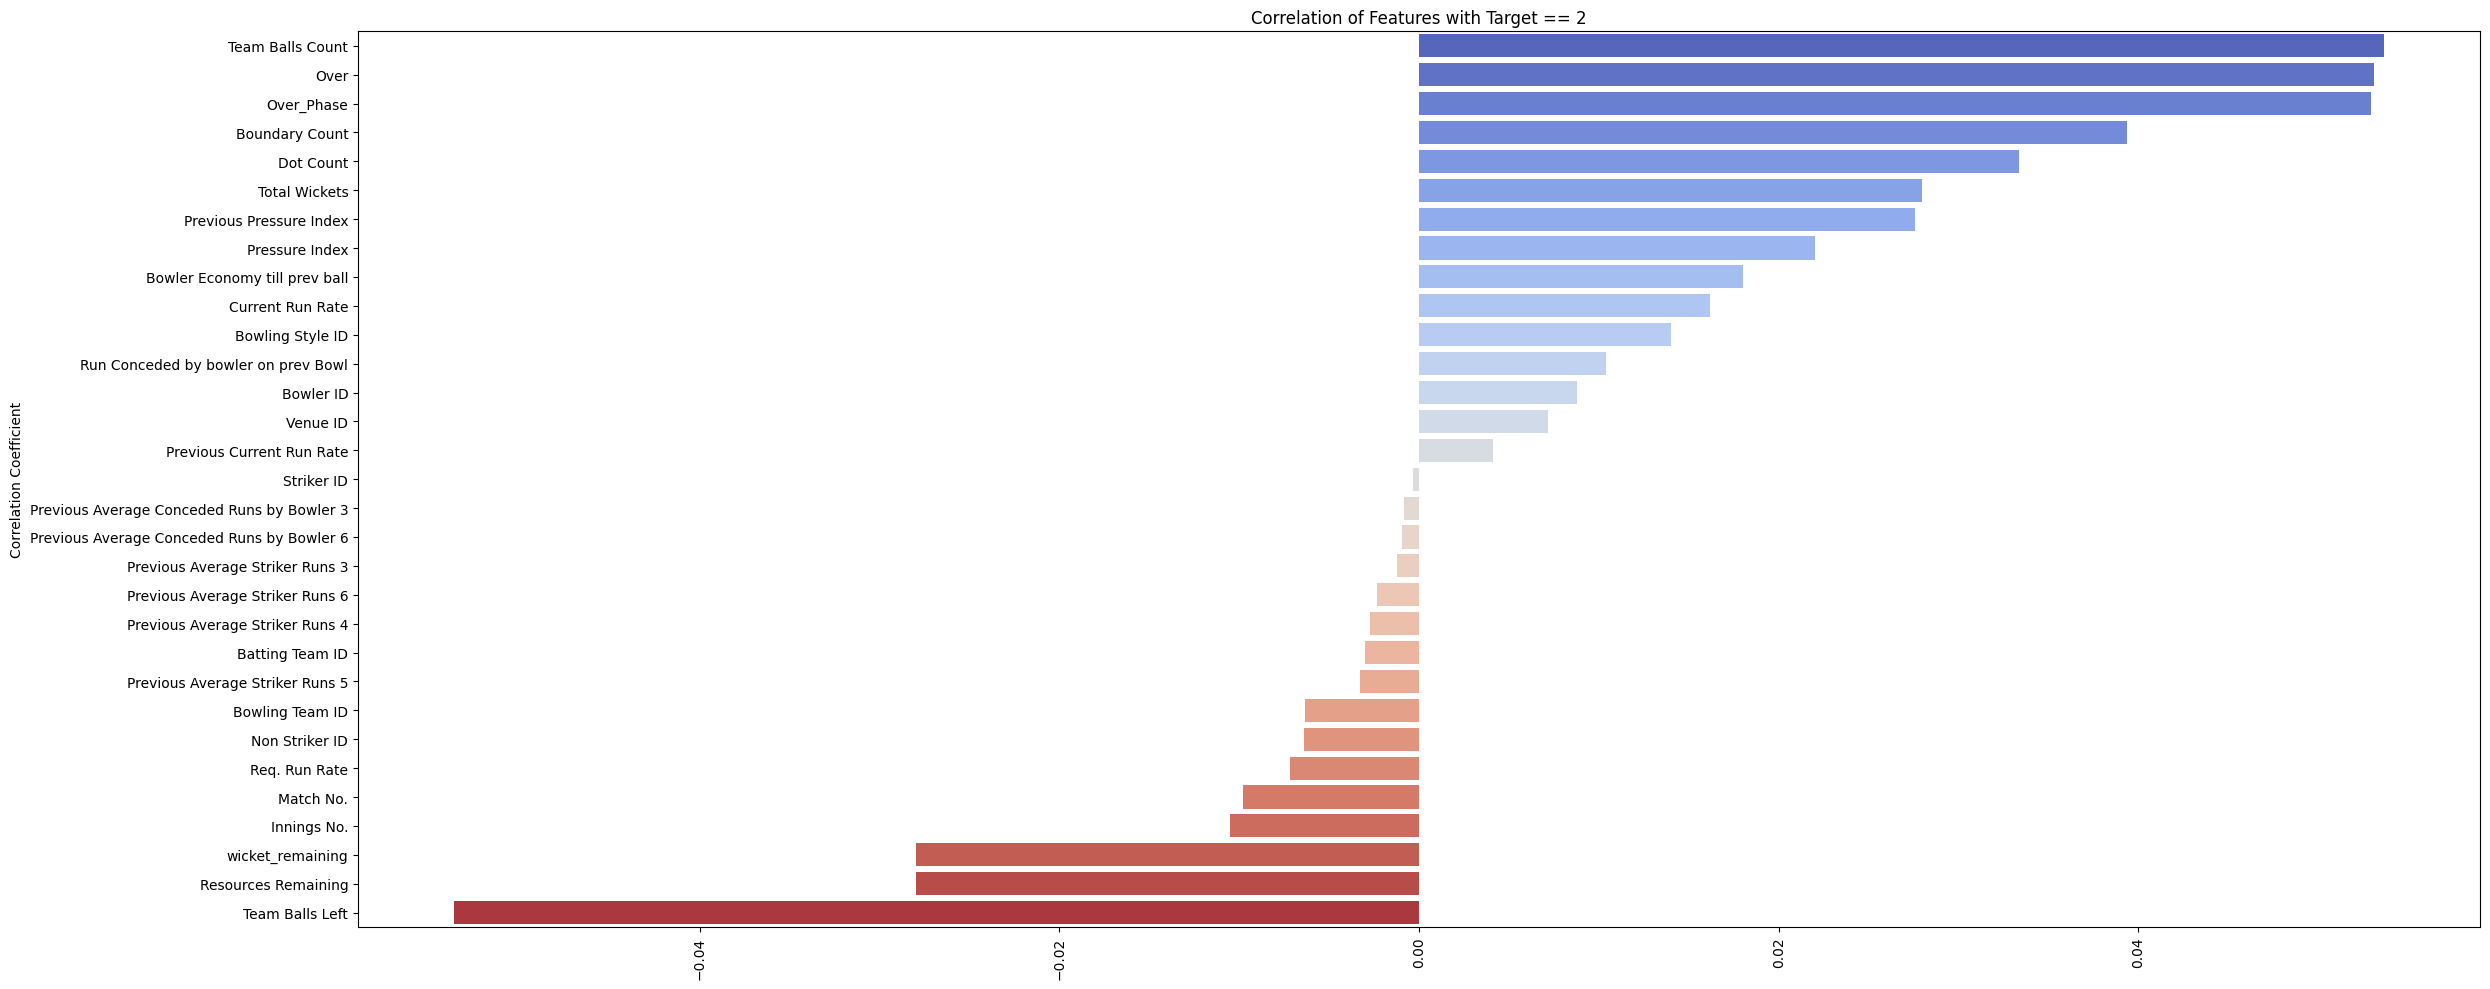

-----------***--------------***-------------***


In [12]:
correlation_with_specific_class(df, feature_cols, target, 2)